In [11]:
!pip install selenium

In [12]:
!pip install selenium pandas matplotlib seaborn chromedriver-autoinstaller -q

In [14]:
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!sudo sh -c 'echo "deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main" >> /etc/apt/sources.list.d/google-chrome.list'
!sudo apt-get update
!sudo apt-get install -y google-chrome-stable

--2025-08-20 17:21:47--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 74.125.142.136, 74.125.142.190, 74.125.142.91, ...
Connecting to dl.google.com (dl.google.com)|74.125.142.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17382 (17K) [application/vnd.exstream-package]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  16.97K  --.-KB/s    in 0s      

2025-08-20 17:21:47 (74.2 MB/s) - ‘linux_signing_key.pub’ saved [17382/17382]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubu

📦 Installing necessary libraries and Google Chrome for Colab...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ Installation complete.

🚀 Web Scraper for LinkedIn.com
🔧 Setting up Chrome WebDriver...
✅ Chrome WebDriver initialized successfully
🎯 Starting to scrape LinkedIn for 'data entry' in 'Pakistan'

📄 Scraping page 1/2...
🔍 Found 88 job cards on page 1
✅ Extracted 1 jobs from page 1

📄 Scraping page 2/2...
🔍 Found 89 job cards on page 2
✅ Extracted 0 jobs from page 2
🔒 Browser closed

🎉 Total jobs scraped: 2

🔍 LINKEDIN SCRAPING ANALYSIS REPORT

📊 OVERVIEW:
Total Jobs Scraped: 2
Unique Companies: 2
Unique Locations: 2

🏢 TOP HIRING COMPANIES:
 1. ACCA Careers: 1 jobs
 2. ibex. Pakistan: 1 jobs

📍 TOP JOB LOCATIONS:
 1. Karāchi, Sindh, Pakistan: 1 jobs
 2. Islamabad, Islāmābād, Pakistan: 1 jobs

🔥 MOST IN-DEMAND SKILLS:
 1. R: 2 mentions


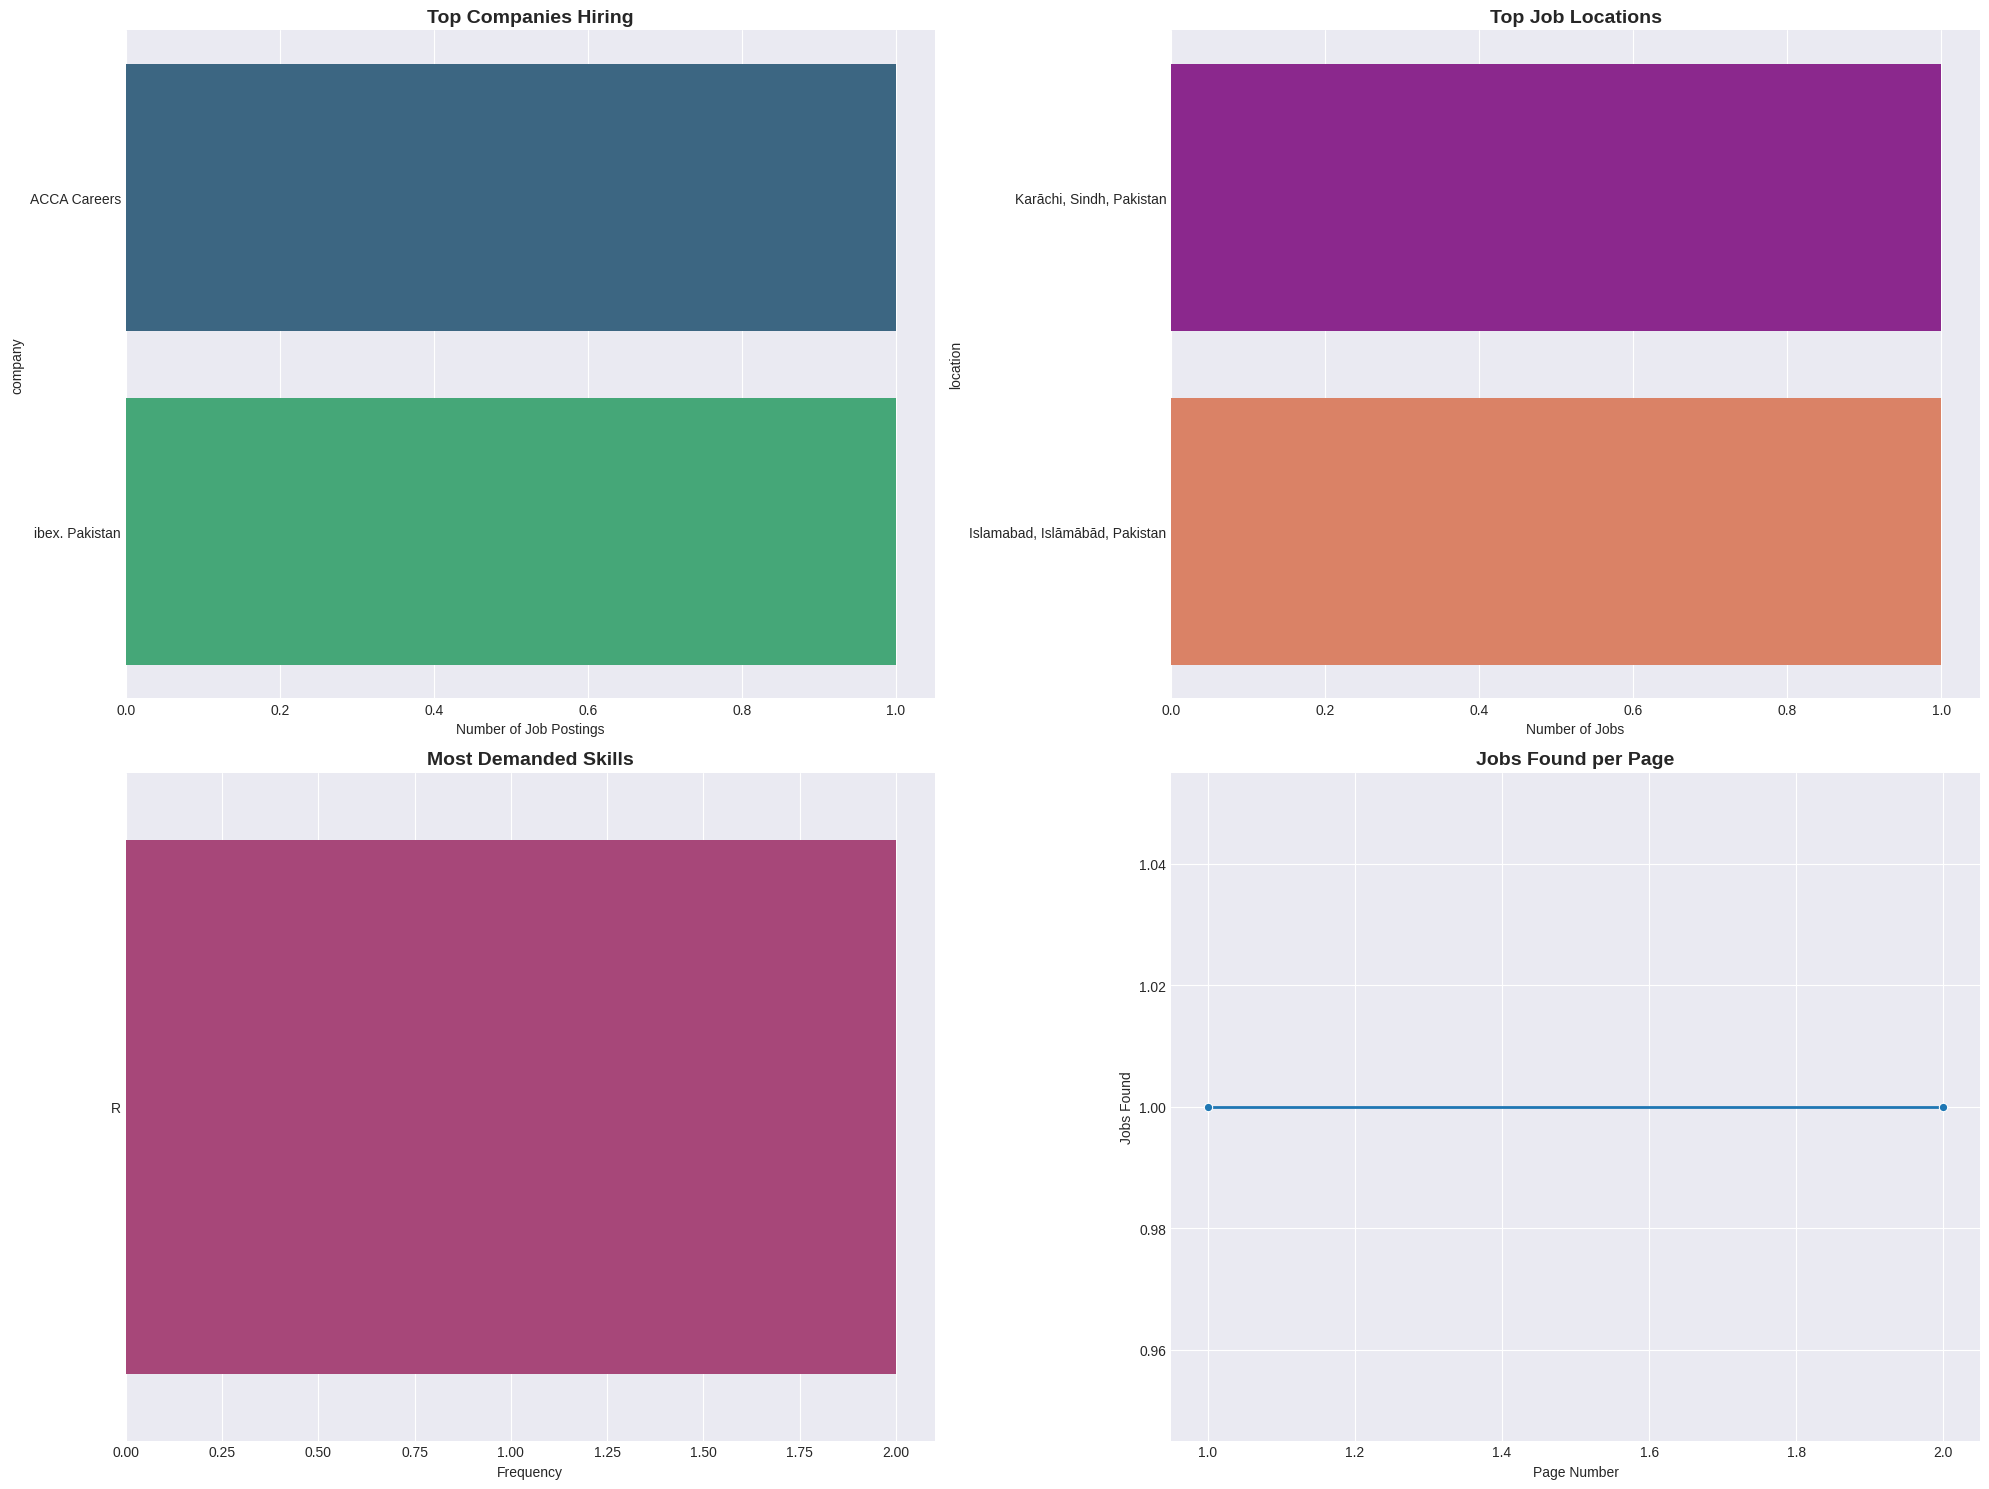

✅ Data saved to linkedin_data_entry_20250820_174536.csv

🔍 LINKEDIN SCRAPING ANALYSIS REPORT

📊 OVERVIEW:
Total Jobs Scraped: 2
Unique Companies: 2
Unique Locations: 2

🏢 TOP HIRING COMPANIES:
 1. ACCA Careers: 1 jobs
 2. ibex. Pakistan: 1 jobs

📍 TOP JOB LOCATIONS:
 1. Karāchi, Sindh, Pakistan: 1 jobs
 2. Islamabad, Islāmābād, Pakistan: 1 jobs

🔥 MOST IN-DEMAND SKILLS:
 1. R: 2 mentions
✅ Report saved to linkedin_data_entry_report_20250820_174536.txt


In [28]:
# Import all necessary libraries
import time
import random
import re
import warnings
from datetime import datetime
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import chromedriver_autoinstaller
from selenium.webdriver.chrome.options import Options

# Ignore potential warnings for cleaner output
warnings.filterwarnings('ignore')

class LinkedInJobScraper:
    """A dynamic web scraper for LinkedIn job listings using Selenium."""

    def __init__(self, headless=True, page_load_timeout=30):
        """Initializes the dynamic job scraper."""
        self.driver = None
        self.headless = headless
        self.page_load_timeout = page_load_timeout
        self.jobs_data = []
        self.skills_keywords = [
            'python', 'java', 'javascript', 'c++', 'c#', 'php', 'ruby', 'go', 'swift', 'kotlin',
            'typescript', 'scala', 'r', 'matlab', 'sql', 'html', 'css', 'react', 'angular', 'vue',
            'node.js', 'laravel', 'django', 'flask', 'spring boot', 'express.js',
            'mysql', 'postgresql', 'mongodb', 'redis', 'oracle', 'sqlite', 'elasticsearch',
            'docker', 'kubernetes', 'jenkins', 'git', 'linux', 'aws', 'azure', 'gcp',
            'machine learning', 'artificial intelligence', 'data science', 'data analysis',
            'web development', 'mobile development', 'ui/ux', 'devops', 'agile', 'scrum',
            'project management', 'digital marketing', 'seo', 'content writing', 'graphic design',
            'communication', 'teamwork', 'leadership', 'problem solving', 'analytical thinking'
        ]

    def setup_driver(self):
        """Setup Chrome WebDriver with optimal configurations."""
        print("🔧 Setting up Chrome WebDriver...")
        chromedriver_autoinstaller.install()

        chrome_options = Options()
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        chrome_options.add_argument('--disable-blink-features=AutomationControlled')
        chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
        chrome_options.add_experimental_option('useAutomationExtension', False)
        chrome_options.add_argument('--disable-images')
        chrome_options.add_argument('--disable-extensions')
        chrome_options.add_argument('--disable-plugins')
        chrome_options.add_argument('--disable-gpu')

        user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
        chrome_options.add_argument(f'--user-agent={user_agent}')

        if self.headless:
            chrome_options.add_argument('--headless')

        try:
            self.driver = webdriver.Chrome(options=chrome_options)
            self.driver.set_page_load_timeout(self.page_load_timeout)
            self.driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
            print("✅ Chrome WebDriver initialized successfully")
            return True
        except Exception as e:
            print(f"❌ Failed to initialize Chrome WebDriver: {e}")
            return False

    def human_like_delay(self, min_delay=1, max_delay=3):
        """Add human-like delays between actions."""
        delay = random.uniform(min_delay, max_delay)
        time.sleep(delay)

    def scroll_to_bottom(self):
        """Scrolls the page to load more content."""
        last_height = self.driver.execute_script("return document.body.scrollHeight")
        while True:
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            self.human_like_delay(2, 4)
            new_height = self.driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

    def scrape_linkedin_jobs(self, search_term="data entry", location="Pakistan", max_pages=2):
        """Scrape LinkedIn for job listings."""
        if not self.setup_driver():
            return None

        print(f"🎯 Starting to scrape LinkedIn for '{search_term}' in '{location}'")

        base_url = "https://www.linkedin.com/jobs/search/"
        search_url = f"{base_url}?keywords={search_term.replace(' ', '%20')}&location={location.replace(' ', '%20')}&sortBy=DD"

        all_jobs = []

        try:
            for page in range(max_pages):
                print(f"\n📄 Scraping page {page + 1}/{max_pages}...")
                current_url = f"{search_url}&start={page * 25}"
                self.driver.get(current_url)
                self.human_like_delay(3, 5)

                try:
                    WebDriverWait(self.driver, 15).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, '.jobs-search__results-list > li'))
                    )
                except TimeoutException:
                    print("⚠️ Timeout waiting for job listings. No jobs found on this page.")
                    break

                self.scroll_to_bottom()

                job_cards = self.driver.find_elements(By.CSS_SELECTOR, '.jobs-search__results-list > li')
                print(f"🔍 Found {len(job_cards)} job cards on page {page + 1}")

                for i, card in enumerate(job_cards):
                    job_data = self.extract_linkedin_job_info(card, page)
                    if job_data and job_data.get('title'):
                        all_jobs.append(job_data)

                print(f"✅ Extracted {len(all_jobs) - len(self.jobs_data)} jobs from page {page + 1}")
                self.jobs_data = all_jobs
                self.human_like_delay(5, 8)

        except Exception as e:
            print(f"❌ Error during scraping: {e}")

        finally:
            if self.driver:
                self.driver.quit()
            print("🔒 Browser closed")

        self.jobs_data = all_jobs
        print(f"\n🎉 Total jobs scraped: {len(all_jobs)}")
        return all_jobs

    def extract_linkedin_job_info(self, card, page_num):
        """Extract data from a single job card on LinkedIn."""
        job = {
            'page': page_num + 1,
            'title': '',
            'company': '',
            'location': '',
            'posted_date': '',
            'skills': [],
            'job_url': ''
        }

        try:
            # NEW & IMPROVED: Selector for job title and URL
            title_elem = card.find_element(By.CSS_SELECTOR, '.base-search-card__info h3')
            job['title'] = title_elem.text.strip()
            job_url_elem = card.find_element(By.CSS_SELECTOR, '.base-card__full-link')
            job['job_url'] = job_url_elem.get_attribute('href')
        except NoSuchElementException:
            pass

        try:
            # NEW & IMPROVED: Selector for company name
            company_elem = card.find_element(By.CSS_SELECTOR, '.base-search-card__subtitle a')
            job['company'] = company_elem.text.strip()
        except NoSuchElementException:
            pass

        try:
            # NEW & IMPROVED: Selector for location
            location_elem = card.find_element(By.CSS_SELECTOR, '.job-search-card__location')
            job['location'] = location_elem.text.strip()
        except NoSuchElementException:
            pass

        try:
            # NEW & IMPROVED: Selector for posted date
            date_elem = card.find_element(By.CSS_SELECTOR, '.job-search-card__listdate')
            job['posted_date'] = date_elem.text.strip()
        except NoSuchElementException:
            pass

        text_to_analyze = f"{job['title']}".lower()
        job['skills'] = self.extract_skills(text_to_analyze)

        return job

    def extract_skills(self, text):
        """Extract skills from job text."""
        found_skills = []
        text_lower = text.lower()

        for skill in self.skills_keywords:
            if skill.lower() in text_lower:
                found_skills.append(skill.title())

        return list(set(found_skills))

    def analyze_scraped_data(self):
        """Comprehensive analysis of scraped job data."""
        if not self.jobs_data:
            print("❌ No data to analyze!")
            return None

        df = pd.DataFrame(self.jobs_data)

        print("\n" + "="*60)
        print("🔍 LINKEDIN SCRAPING ANALYSIS REPORT")
        print("="*60)

        print(f"\n📊 OVERVIEW:")
        print(f"Total Jobs Scraped: {len(df)}")
        print(f"Unique Companies: {df['company'].nunique()}")
        print(f"Unique Locations: {df['location'].nunique()}")

        print(f"\n🏢 TOP HIRING COMPANIES:")
        top_companies = df['company'].value_counts().head(10)
        for i, (company, count) in enumerate(top_companies.items(), 1):
            if company:
                print(f"{i:2d}. {company}: {count} jobs")

        print(f"\n📍 TOP JOB LOCATIONS:")
        top_locations = df['location'].value_counts().head(10)
        for i, (location, count) in enumerate(top_locations.items(), 1):
            if location:
                print(f"{i:2d}. {location}: {count} jobs")

        all_skills = [skill for skills_list in df['skills'] for skill in skills_list]

        if all_skills:
            print(f"\n🔥 MOST IN-DEMAND SKILLS:")
            skill_counts = Counter(all_skills).most_common(15)
            for i, (skill, count) in enumerate(skill_counts, 1):
                print(f"{i:2d}. {skill}: {count} mentions")

        return df

    def create_visualizations(self, df=None):
        """Create visualizations for scraped data."""
        if df is None:
            if not self.jobs_data:
                print("❌ No data for visualization!")
                return
            df = pd.DataFrame(self.jobs_data)

        plt.style.use('seaborn-v0_8-darkgrid')
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))

        # 1. Top Companies
        top_companies = df['company'].value_counts().head(8)
        sns.barplot(ax=axes[0, 0], x=top_companies.values, y=top_companies.index, palette='viridis')
        axes[0, 0].set_xlabel('Number of Job Postings')
        axes[0, 0].set_title('Top Companies Hiring', fontweight='bold', fontsize=14)

        # 2. Top Locations
        top_locations = df['location'].value_counts().head(8)
        sns.barplot(ax=axes[0, 1], x=top_locations.values, y=top_locations.index, palette='plasma')
        axes[0, 1].set_xlabel('Number of Jobs')
        axes[0, 1].set_title('Top Job Locations', fontweight='bold', fontsize=14)

        # 3. Most Demanded Skills
        all_skills = [skill for skills_list in df['skills'] for skill in skills_list]
        if all_skills:
            skill_counts = Counter(all_skills).most_common(10)
            skills, counts = zip(*skill_counts)
            sns.barplot(ax=axes[1, 0], x=list(counts), y=list(skills), palette='magma')
            axes[1, 0].set_xlabel('Frequency')
            axes[1, 0].set_title('Most Demanded Skills', fontweight='bold', fontsize=14)

        # 4. Jobs per page
        page_counts = df['page'].value_counts().sort_index()
        sns.lineplot(ax=axes[1, 1], x=page_counts.index, y=page_counts.values, marker='o', linewidth=2)
        axes[1, 1].set_xlabel('Page Number')
        axes[1, 1].set_ylabel('Jobs Found')
        axes[1, 1].set_title('Jobs Found per Page', fontweight='bold', fontsize=14)

        plt.tight_layout()
        plt.show()

    def save_results(self, filename_prefix='linkedin_scrape'):
        """Save scraping results to files."""
        if not self.jobs_data:
            print("❌ No data to save!")
            return

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        df = pd.DataFrame(self.jobs_data)
        csv_filename = f'{filename_prefix}_{timestamp}.csv'
        df.to_csv(csv_filename, index=False)
        print(f"✅ Data saved to {csv_filename}")

        report_filename = f'{filename_prefix}_report_{timestamp}.txt'
        with open(report_filename, 'w', encoding='utf-8') as f:
            f.write("LINKEDIN JOB SCRAPING REPORT\n")
            f.write("="*50 + "\n\n")
            f.write(f"Scraping completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Total jobs scraped: {len(self.jobs_data)}\n\n")

            df_analysis = self.analyze_scraped_data()
            if df_analysis is not None:
                f.write(f"\nTop 10 Companies:\n{df_analysis['company'].value_counts().head(10).to_string()}\n")
                f.write(f"\nTop 10 Locations:\n{df_analysis['location'].value_counts().head(10).to_string()}\n")

        print(f"✅ Report saved to {report_filename}")

def linkedin_scrape_example():
    """Quick example of scraping from LinkedIn."""
    scraper = LinkedInJobScraper(headless=True)
    jobs = scraper.scrape_linkedin_jobs(
        search_term="data entry",
        location="Pakistan",
        max_pages=2
    )

    if jobs:
        df = scraper.analyze_scraped_data()
        scraper.create_visualizations(df)
        scraper.save_results('linkedin_data_entry')

if __name__ == "__main__":
    print("📦 Installing necessary libraries and Google Chrome for Colab...")
    !pip install selenium pandas matplotlib seaborn chromedriver-autoinstaller -q
    !apt-get update -qq
    !apt-get install -y google-chrome-stable -qq
    print("✅ Installation complete.")

    print("\n🚀 Web Scraper for LinkedIn.com")
    linkedin_scrape_example()

